In [549]:
#import all necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [550]:
#import dataset
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [551]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [552]:
#convert total charges from category to integer
data.replace(' ',pd.NA,inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [553]:
#feature engineering to identify if there is a charge difference due to discounts or extra fees for installation
data['charge_difference']=data['TotalCharges']-(data['MonthlyCharges']*data['tenure'])

In [554]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_difference
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.00
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,-46.80
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.45
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-62.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,10.25


In [555]:
#display values for category values
for col in data.columns:
    if data[col].dtype == 'object':
        print(f'{col} : {data[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [556]:
#check for missing values
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
charge_difference    11
dtype: int64

In [557]:
#seperate tenures into bins to see how it affects churn rate
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 60, np.inf], labels=[1, 2, 3, 4, 5])

In [558]:
data['tenure_group'].value_counts()

tenure_group
1    2175
4    1594
5    1407
2    1024
3     832
Name: count, dtype: int64

In [559]:
#check shape of matrix
data.shape

(7043, 23)

In [560]:
#drop missing data from rows
data.dropna(inplace=True)

In [561]:
#drop customer ID(irrelevent) and gender(to prevent dispropotionate offers)
data=data.drop(['gender','customerID'], axis=1)

In [562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SeniorCitizen      7032 non-null   int64   
 1   Partner            7032 non-null   object  
 2   Dependents         7032 non-null   object  
 3   tenure             7032 non-null   int64   
 4   PhoneService       7032 non-null   object  
 5   MultipleLines      7032 non-null   object  
 6   InternetService    7032 non-null   object  
 7   OnlineSecurity     7032 non-null   object  
 8   OnlineBackup       7032 non-null   object  
 9   DeviceProtection   7032 non-null   object  
 10  TechSupport        7032 non-null   object  
 11  StreamingTV        7032 non-null   object  
 12  StreamingMovies    7032 non-null   object  
 13  Contract           7032 non-null   object  
 14  PaperlessBilling   7032 non-null   object  
 15  PaymentMethod      7032 non-null   object  
 16  MonthlyChar

In [563]:
#convert no internet service to no as there is a column with internet service
data['OnlineSecurity']=data['OnlineSecurity'].replace('No internet service','No')
data['OnlineBackup']=data['OnlineBackup'].replace('No internet service','No')
data['DeviceProtection']=data['DeviceProtection'].replace('No internet service','No')
data['TechSupport']=data['TechSupport'].replace('No internet service','No')
data['StreamingTV']=data['StreamingTV'].replace('No internet service','No')
data['StreamingMovies']=data['StreamingMovies'].replace('No internet service','No')
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')
data['Contract']=data['Contract'].replace('Month-to-month','Month')
for col in data.columns:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['Yes' 'No']
Unique values in DeviceProtection: ['No' 'Yes']
Unique values in TechSupport: ['No' 'Yes']
Unique values in StreamingTV: ['No' 'Yes']
Unique values in StreamingMovies: ['No' 'Yes']
Unique values in Contract: ['Month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card

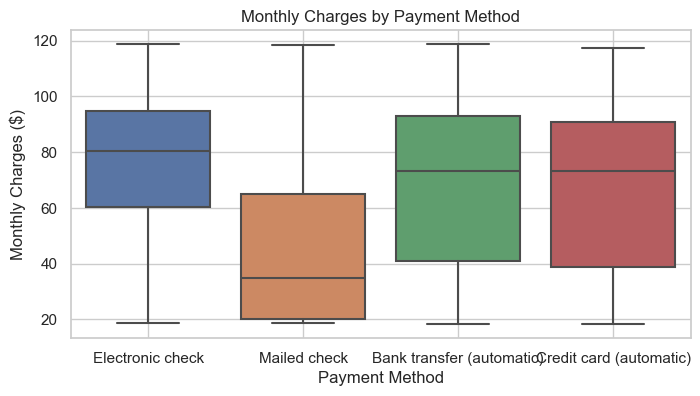

In [564]:
# payment methods vs monthly charges
plt.figure(figsize=(8, 4))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Payment Method')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Payment Method')
plt.grid(True)
plt.show()

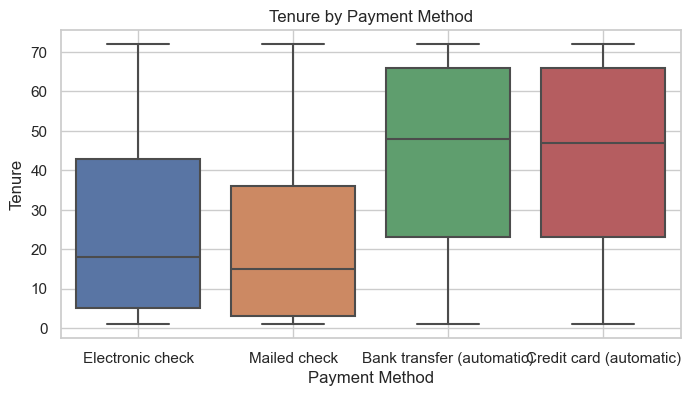

In [565]:
#payment methods vs tenure
plt.figure(figsize=(8,4))
sns.boxplot(x='PaymentMethod', y='tenure', data=data)
plt.title('Tenure by Payment Method')
plt.ylabel('Tenure')
plt.xlabel('Payment Method')
plt.grid(True)
plt.show()

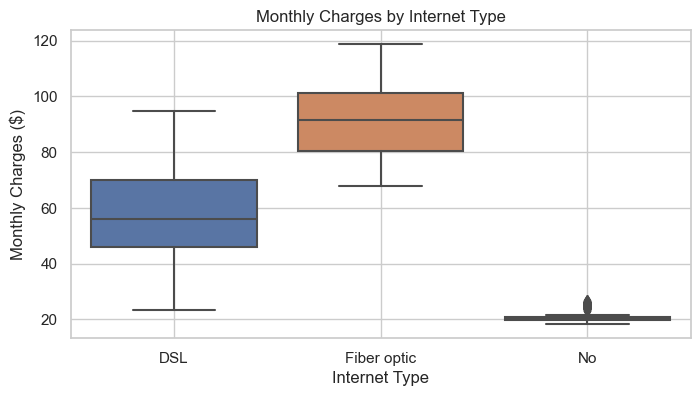

In [566]:
#monthly charges by internet type
plt.figure(figsize=(8,4))
sns.boxplot(x='InternetService', y='MonthlyCharges', data=data)
plt.title('Monthly Charges by Internet Type')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Internet Type')
plt.grid(True)
plt.show()

C:\Users\abc7c\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


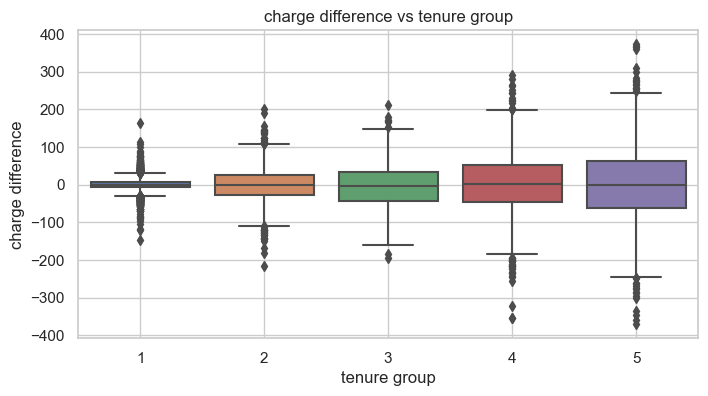

In [567]:
# tenure_group vs charge difference
plt.figure(figsize=(8,4))
sns.boxplot(x='tenure_group', y='charge_difference', data=data)
plt.title('charge difference vs tenure group')
plt.ylabel('charge difference')
plt.xlabel('tenure group')
plt.grid(True)
plt.show()

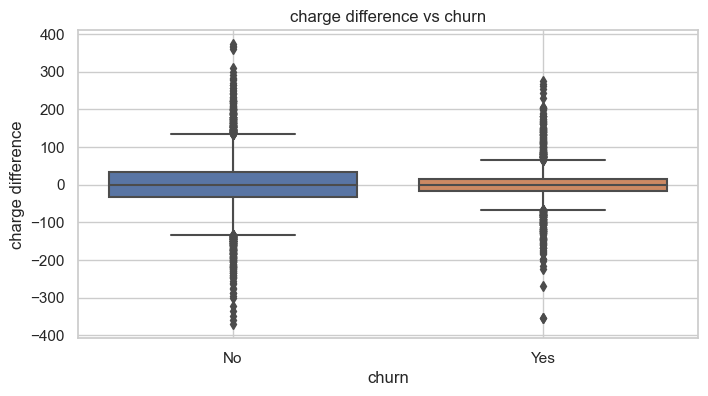

In [568]:
# churn vs charge difference
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='charge_difference', data=data)
plt.title('charge difference vs churn')
plt.ylabel('charge difference')
plt.xlabel('churn')
plt.grid(True)
plt.show()

C:\Users\abc7c\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\abc7c\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


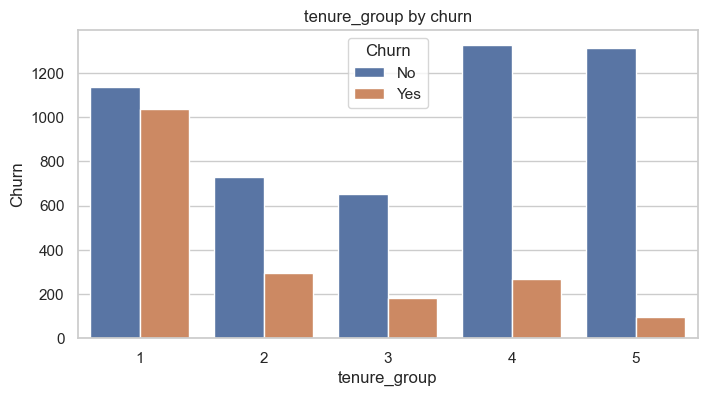

In [569]:
sns.set(style="whitegrid")

#tenure group vs churn
plt.figure(figsize=(8,4))
sns.countplot(x='tenure_group', hue='Churn', data=data)
plt.title('tenure_group by churn')
plt.xlabel('tenure_group')
plt.ylabel('Churn')

# Show the plot
plt.show()

#as  expected short tenures relate to high churn 

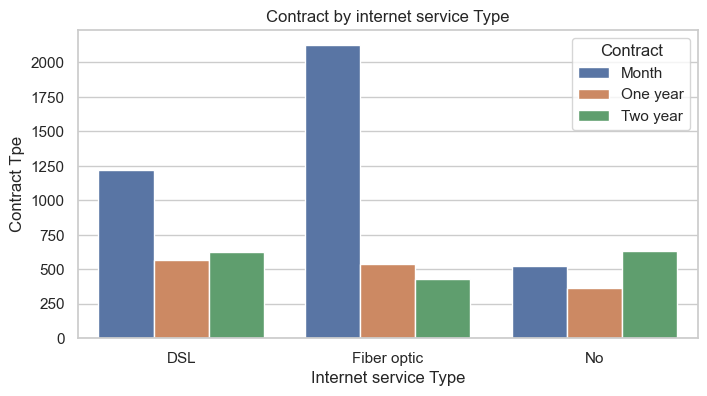

In [570]:
sns.set(style="whitegrid")

# internet service vs contract
plt.figure(figsize=(8,4))
sns.countplot(x='InternetService', hue='Contract', data=data)
plt.title('Contract by internet service Type')
plt.xlabel('Internet service Type')
plt.ylabel('Contract Tpe')

# Show the plot
plt.show()


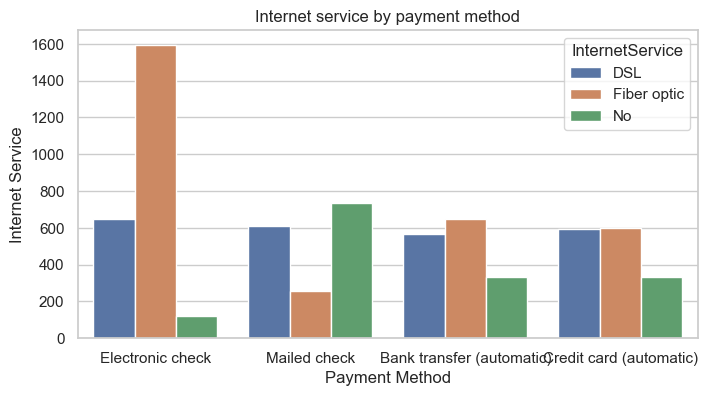

In [571]:
sns.set(style="whitegrid")

#payment method vs internet service
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='InternetService', data=data)
plt.title('Internet service by payment method')
plt.xlabel('Payment Method')
plt.ylabel('Internet Service')

# Show the plot
plt.show()

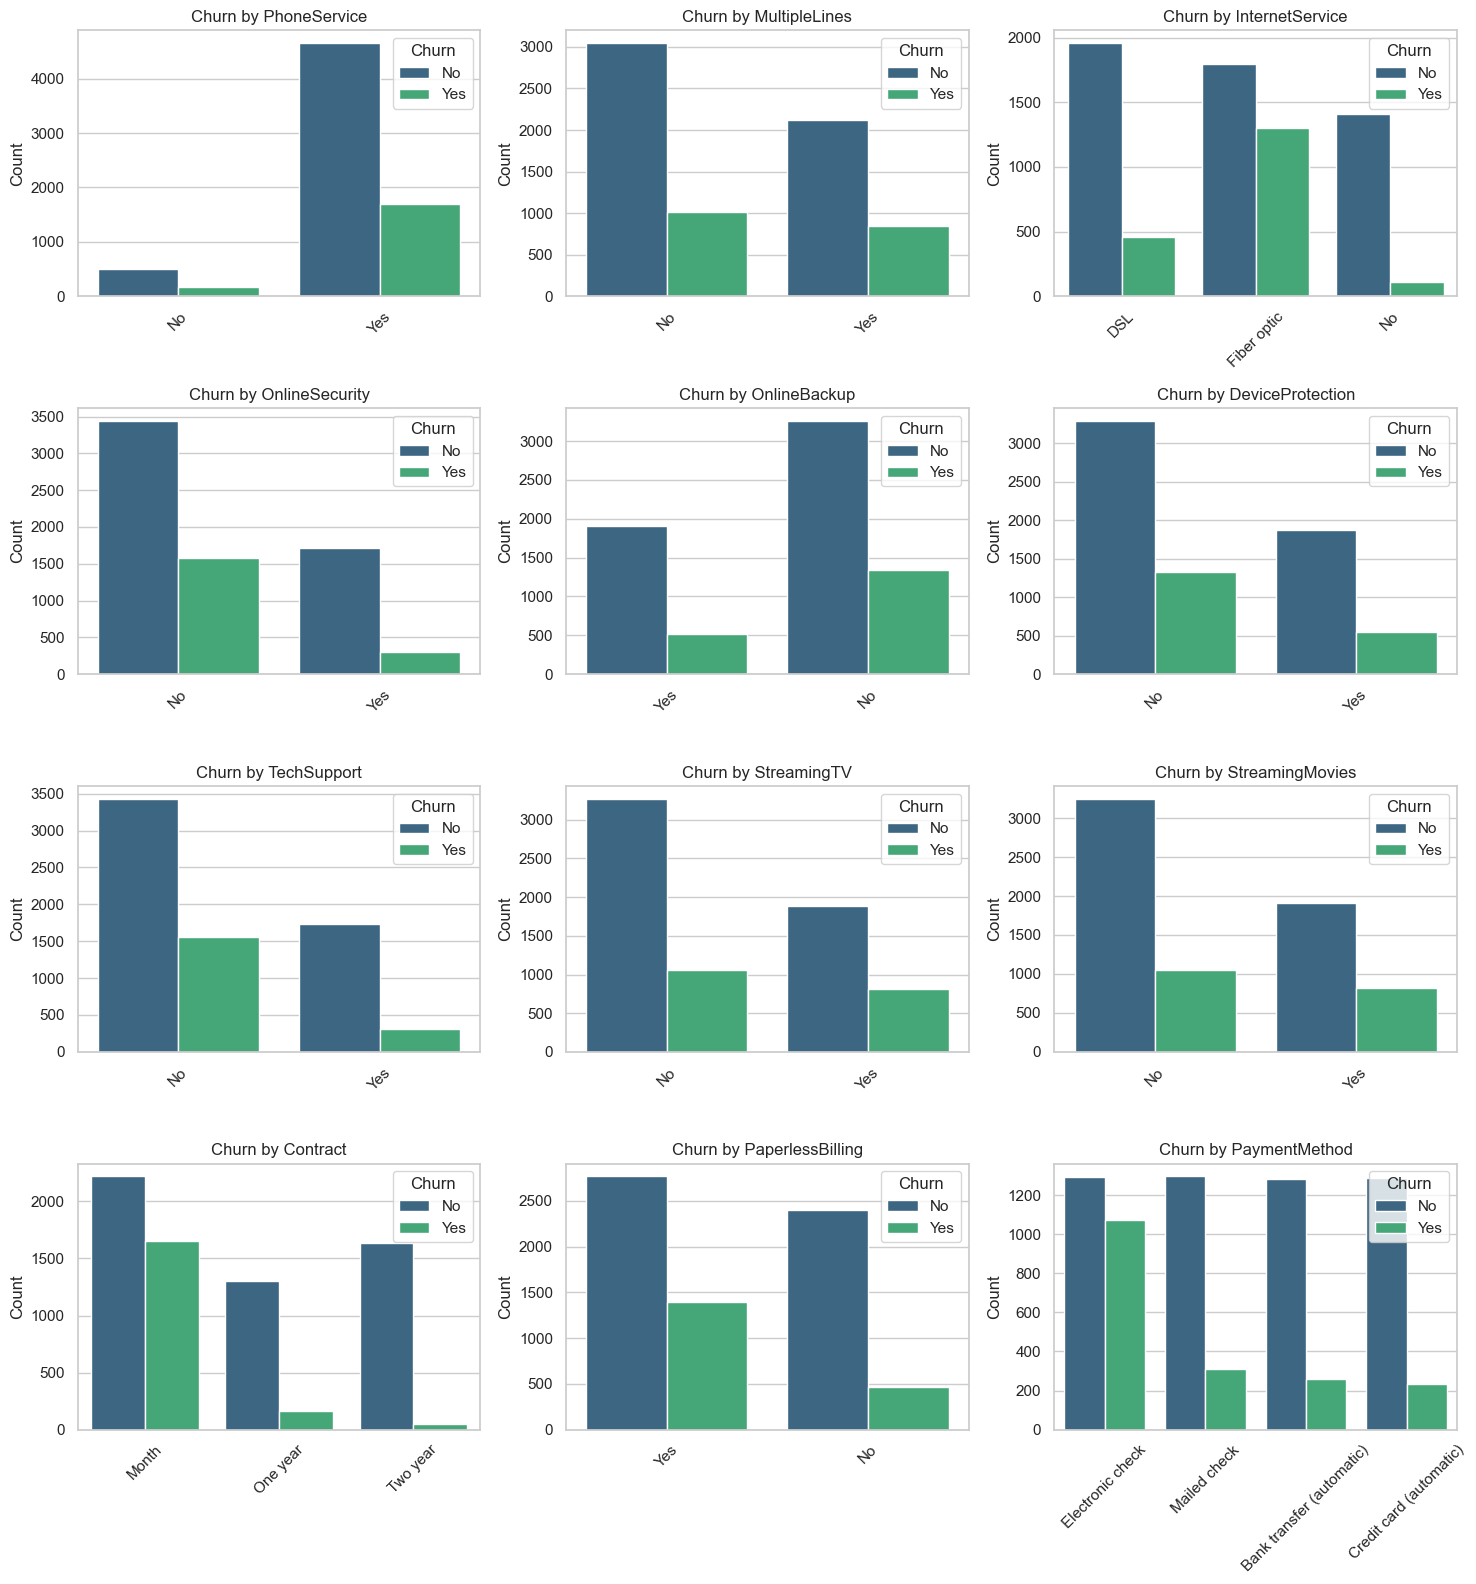

In [572]:
#plot different variables vs churn
variables_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


n_cols = 3
n_rows = (len(variables_to_plot) + n_cols - 1) // n_cols  
plt.figure(figsize=(15, n_rows * 4)) 
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=variable, hue='Churn', data=data, palette='viridis')
    plt.title(f'Churn by {variable}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()


plt.show()



In [573]:
#split difference in charges as zero, negative and positive
data['ChargesDiffCategory'] = pd.cut(
    data['charge_difference'],
    bins=[-float('inf'), -0.001, 0.001, float('inf')],
    labels=['Negative', 'Zero', 'Positive']
)

# Verify the categorization
print(data[['charge_difference', 'ChargesDiffCategory']].head())

   charge_difference ChargesDiffCategory
0               0.00                Zero
1             -46.80            Negative
2               0.45            Positive
3             -62.75            Negative
4              10.25            Positive


In [574]:
#check chi square relationship between difference in charge and churn
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['ChargesDiffCategory'], data['Churn'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2 = {chi2}, p-value = {p}')

Chi-square test: chi2 = 433.89008726676315, p-value = 6.052916373196584e-95


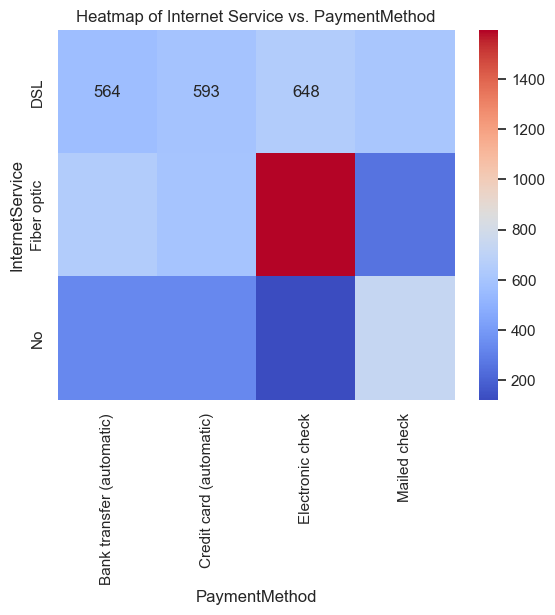

In [575]:
#from the above plots electronic check, month to month contract and fibre optic seem to have higher churn. 
#Heatmaps to check collinearity between independent variables
ct = pd.crosstab(data['InternetService'], data['PaymentMethod'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Internet Service vs. PaymentMethod')
plt.show()

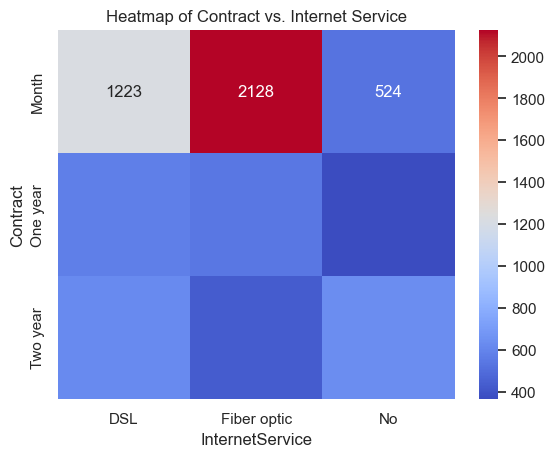

In [576]:
ct = pd.crosstab(data['Contract'], data['InternetService'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Contract vs. Internet Service')
plt.show()

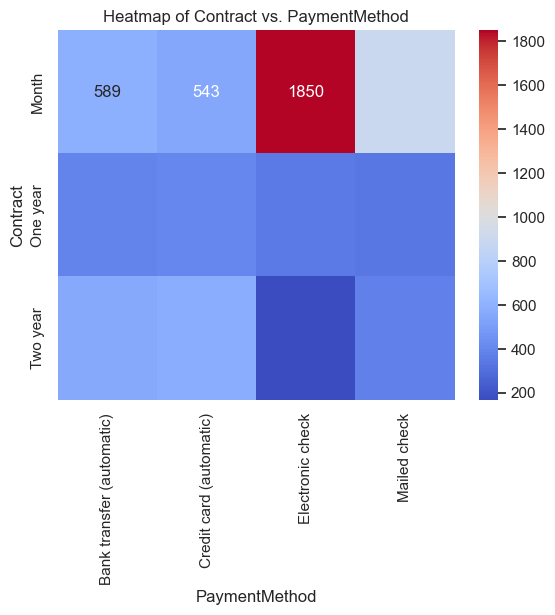

In [577]:
ct = pd.crosstab(data['Contract'], data['PaymentMethod'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Contract vs. PaymentMethod')
plt.show()

In [578]:
#check how churn rate for the combination of fibre optic, electronic check and month to month contract compares to overall churn rate
#Filter the data for the specific group
group_data = data[(data['InternetService'] == 'Fiber optic') & (data['PaymentMethod'] == 'Electronic check') & (data['Contract'] == 'Month')]

# Calculate churn rate
churn_rate = group_data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate for Group:")
print(churn_rate)# Filter the data for the specific group


Churn Rate for Group:
Churn
Yes    60.367253
No     39.632747
Name: proportion, dtype: float64


In [579]:
overall_churn_rate = data['Churn'].value_counts(normalize=True) * 100
print("Overall Churn Rate:")
print(overall_churn_rate)

Overall Churn Rate:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [580]:
#check how much churn occurs inside the specific segments:
is_data = data[(data['InternetService'] == 'Fiber optic')]
pm_data = data[(data['PaymentMethod'] == 'Electronic check')]
cn_data = data[(data['Contract'] == 'Month')]
churn_rate1 = is_data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate for fibre:")
print(churn_rate1)
churn_rate2 = pm_data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate for electronic check:")
print(churn_rate2)
churn_rate3 = cn_data['Churn'].value_counts(normalize=True) * 100
print("Churn Rate for month to month contract:")
print(churn_rate3)

Churn Rate for fibre:
Churn
No     58.107235
Yes    41.892765
Name: proportion, dtype: float64
Churn Rate for electronic check:
Churn
No     54.714588
Yes    45.285412
Name: proportion, dtype: float64
Churn Rate for month to month contract:
Churn
No     57.290323
Yes    42.709677
Name: proportion, dtype: float64


In [581]:
print( data.groupby('InternetService').size())
print( data.groupby('PaymentMethod').size())
print( data.groupby('Contract').size())

#the churn rates are high for the specific variable segments
#the specific segments also form the largest portions of the variables

InternetService
DSL            2416
Fiber optic    3096
No             1520
dtype: int64
PaymentMethod
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
dtype: int64
Contract
Month       3875
One year    1472
Two year    1685
dtype: int64


In [582]:
#one hot encode for category variables
data = pd.get_dummies(data, columns=['InternetService', 'PaymentMethod', 'Contract', 'tenure_group'], drop_first=False)

In [583]:
#label all boolean and category values
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})


    

In [584]:
#check class imbalance in churn
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [585]:
#drop tenure and chargesdiffcategory as there is a tenure group and charge difference in the dataset
data=data.drop(['tenure', 'ChargesDiffCategory'],axis=1)

In [586]:
#random forest classifier with stratify as y as there is seems to be a class imbalance in churn
X = data.drop('Churn', axis=1)  # Assuming 'Churn' is the column to predict
y = data['Churn']   # Ensure 'Churn' is integer coded (0 = No, 1 = Yes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
rf = RandomForestClassifier(random_state=42)

In [587]:

#train the model on hyperparameters and refit on recall 
#as we should try to get less false negatives to prevent customers from churning 
#but could come at a cost high promotional expense, if that's also important we could refit on f1
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring_metrics, refit='recall', cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score found: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}
Best recall score found:  0.49230769230769234


recall: 0.4946524064171123

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
 [[909 124]
 [189 185]]


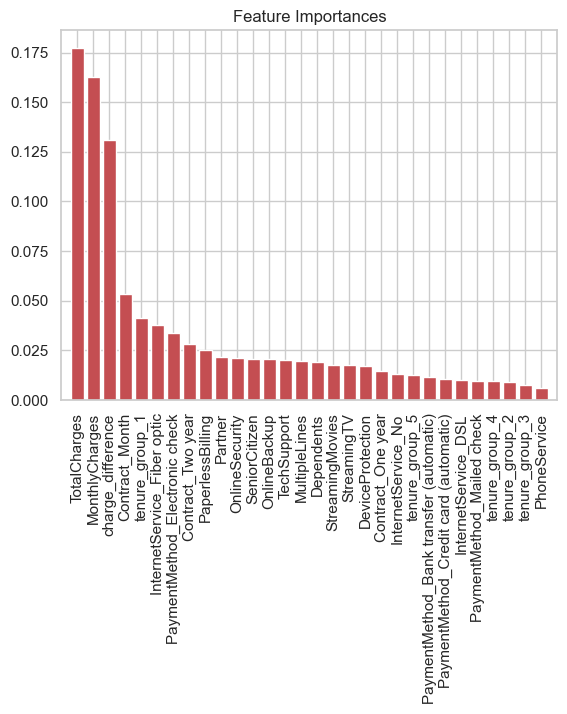

In [588]:
#fit the tuned model on random forest classifier

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#model evaluations
print("recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


#plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#the model may need more or different feature engineering to improve recall
#difference in charge, espcially if it is zero has a high churn rate. 
#Possibility of lack of discounts or interests in other services requiring installations or extra charges could lead to churn
#as seen in EDA electronic check, fibre optic and monthly contracts are important features
#short tenures possibly overlapping with monthly contracts are also an important feature in identifying churn